## Análisis de Datos de Energía del mercado español

El objetivo de este análisis es explorar y comprender el comportamiento del mercado energético a partir de datos reales de consumo y/o precios de electricidad. Se busca identificar patrones temporales, variaciones en el consumo, posibles tendencias de energía más económica y diferencias entre períodos, con el fin de detectar oportunidades de optimización energética.

## Dataset 

1. Spanish Electricity Market: Demand, Gen. & Price

##  Descripción del dataset – Mercado eléctrico (España, Francia y Portugal)

Cada **nombre de columna describe una serie temporal**, y a continuación se detalla su significado:

###  Demanda

* **Demanda programada PBF total (MWh)** (estimacion previa del consumo)
  → Demanda total programada en el PBF (Programación Base de Funcionamiento).

* **Demanda real (MW)** (consumo real)
  → Potencia demandada real.

###  Mercados SPOT(subasta diaria de electricidad.)

* **Energía asignada en Mercado SPOT Diario España (MWh)**
  → Energía negociada en el mercado diario español (OMIE).

* **Energía asignada en Mercado SPOT Diario Francia (MWh)**
  → Energía negociada en el mercado diario francés.

### Generación eléctrica programada (PBF) (origen de la energia)

* **Generación programada PBF Carbón (MWh)**(energia planeada a producir de carbon)
  → Generación eléctrica programada con carbón.

* **Generación programada PBF Ciclo combinado (MWh)**
  → Generación eléctrica programada con ciclos combinados.

* **Generación programada PBF Eólica (MWh)**
  → Generación eléctrica programada de origen eólico.

* **Generación programada PBF Gas Natural Cogeneración (MWh)**
  → Generación eléctrica programada mediante cogeneración con gas natural.

* **Generación programada PBF Nuclear (MWh)**
  → Generación eléctrica programada de origen nuclear.

* **Generación programada PBF Solar fotovoltaica (MWh)**
  → Generación eléctrica programada de origen solar fotovoltaico.

* **Generación programada PBF Turbinación bombeo (MWh)**
  → Generación eléctrica programada mediante hidráulica reversible (bombeo).

* **Generación programada PBF UGH + no UGH (MWh)**
  → Generación hidráulica total (unidades de gestión hidráulica + no UGH).

* **Generación programada PBF total (MWh)**(suma total de toda la energía que se planea generar)
  → Generación eléctrica total programada.

### Precios del mercado diario (variable objetivo)

* **Precio mercado SPOT Diario ESP (€/MWh)**
  → Precio diario del mercado SPOT en España.

* **Precio mercado SPOT Diario FRA (€/MWh)**
  → Precio diario del mercado SPOT en Francia.

* **Precio mercado SPOT Diario POR (€/MWh)**
  → Precio diario del mercado SPOT en Portugal.

### Rentas de congestión (interconexiones) 

Excedentes económicos que se generan cuando la red de transporte alcanza su límite de capacidad. En estos casos, la importación de energía suele estar asociada a precios más elevados.

* **Rentas de congestión mecanismos implícitos diario Francia exportación (€/MWh)**
  → Precio asociado a la exportación diaria hacia Francia.

* **Rentas de congestión mecanismos implícitos diario Francia importación (€/MWh)**
  → Precio asociado a la importación diaria desde Francia.

* **Rentas de congestión mecanismos implícitos diario Portugal exportación (€/MWh)**
  → Precio asociado a la exportación diaria hacia Portugal.

* **Rentas de congestión mecanismos implícitos diario Portugal importación (€/MWh)**
  → Precio asociado a la importación diaria desde Portugal.

---

### Notas adicionales

* El **formato original de los datos se mantiene**, para facilitar la incorporación futura de nuevos datos descargados desde **ESIOS**.
* Las columnas geográficas están en **null**, ya que no se utilizan en este dataset.

## Hipotesis iniciales

### **Relación entre demanda y precio**

Se espera que **a mayor demanda eléctrica, mayor sea el precio de la energía en el mercado spot**

### **Patrones temporales del precio**

Existen **patrones temporales en el precio de la energía**, donde ciertos períodos del día, meses o estaciones del año presentan precios sistemáticamente más bajos o más altos.

### **Influencia del origen de la generación**

El **tipo de fuente de generación eléctrica influye en el precio**. Se espera que una mayor participación de energías renovables (como eólica y solar) esté asociada a precios más bajos, mientras que una mayor dependencia de fuentes fósiles incremente el costo.

### **Impacto de la importación de energía**

Cuando la demanda interna no puede ser cubierta por la generación nacional y es necesario **importar energía desde otros países**, el precio promedio del mercado español tiende a aumentar.

### **Rentas de congestión y precios elevados**

Las **altas rentas de congestión** indican saturación de las interconexiones eléctricas y posibles desequilibrios entre oferta y demanda, lo que suele estar asociado a **precios más elevados de la energía**.

### **Diferencia entre demanda programada y demanda real**

Las **desviaciones entre la demanda programada y la demanda real** podrían generar ineficiencias en el sistema eléctrico y provocar variaciones inesperadas en el precio.

### **Efecto fin de semana vs días laborables**

Los **fines de semana presentan menor demanda y precios más bajos** en comparación con los días laborables, debido a la reducción de actividad industrial.

### **Dependencia del mercado francés**

Los precios del mercado spot español **podrían verse influenciados por el precio del mercado francés**, especialmente en momentos de alta importación o congestión.


In [1]:
import pandas as pd # trabajar con datasets
import numpy as np # calculo
import matplotlib.pyplot as plt # graficos
import seaborn as sns # plus de matlotlib

In [8]:
df = pd.read_csv("../data/spain_energy_market.csv")
df.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [9]:
df.tail()

,datetime,id,name,geoid,geoname,value
40207,2018-12-27 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8838.0
40208,2018-12-28 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8738.8
40209,2018-12-29 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,9020.0
40210,2018-12-30 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8466.2
40211,2018-12-31 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,10764.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  40212 non-null  object 
 1   id        40212 non-null  int64  
 2   name      34734 non-null  object 
 3   geoid     10956 non-null  float64
 4   geoname   10956 non-null  object 
 5   value     40212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
df.describe()

,id,geoid,value
count,40212.000000,10956.000000,4.021200e+04
mean,2767.757286,2.000000,1.325967e+05
std,4014.664966,0.816534,2.147129e+05
min,3.000000,1.000000,-1.426133e+06
25%,600.000000,1.000000,5.112708e+01
50%,602.000000,2.000000,2.778778e+04
75%,1334.000000,3.000000,1.615399e+05
max,10258.000000,3.000000,2.584390e+06


## Previsualizacion del dataset

En esta fase se realizó una exploración inicial del dataset del mercado eléctrico español con el objetivo de comprender su estructura y características principales.

Se identificó que los datos se encuentran en formato largo (long format), donde cada fila representa una medición de una variable específica en un momento determinado. Esto explica la presencia de múltiples valores nulos, especialmente en columnas como geoid y geoname, que solo aplican a ciertas series.

Asimismo, se detectaron valores extremos y atípicos en la columna value, incluyendo valores negativos, lo que indica que el dataset refleja comportamientos reales del mercado y requiere un proceso de limpieza y preparación antes del análisis exploratorio.

Este conjunto de datos presenta mayor complejidad y heterogeneidad, por lo que será necesario filtrar, transformar y reorganizar las variables antes de avanzar al EDA.

## Limpieza y transformacion de datos

In [12]:
# Convertir la variable datatime de tipo objeto a datetime
df["datetime"] = pd.to_datetime(df["datetime"])

In [34]:
df["name"].unique()[:20]



array(['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA',
       'Precio mercado SPOT Diario POR',
       'Energía asignada en Mercado SPOT Diario España',
       'Energía asignada en Mercado SPOT Diario Francia', nan,
       'Rentas de congestión mecanismos implícitos diario Francia exportación',
       'Rentas de congestión mecanismos implícitos diario Portugal exportación',
       'Rentas de congestión mecanismos implícitos diario Francia importación',
       'Rentas de congestión mecanismos implícitos diario Portugal importación',
       'Demanda real', 'Demanda programada PBF total',
       'Generación programada PBF total',
       'Generación programada PBF Eólica',
       'Generación programada PBF Ciclo combinado',
       'Generación programada PBF Carbón',
       'Generación programada PBF Nuclear',
       'Generación programada PBF Gas Natural Cogeneración',
       'Generación programada PBF UGH + no UGH',
       'Generación programada PBF Solar fotovoltaica'

In [35]:
#limpiar minusulas, espacios, etc
df = df.copy()

df["name_norm"] = (
    df["name"]
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r"\(.*?\)", "", regex=True)  # quita unidades
)

In [ ]:
# seleccion de variables relevantes, normalizacion de variables
name_map = {
    "precio mercado spot diario esp": "precio_spot_esp",
    "demanda real": "demanda_real",
    "demanda programada pbf total": "demanda_pbf_total",
    "generación programada pbf eólica": "gen_eolica",
    "generación programada pbf solar fotovoltaica": "gen_solar",
    "generación programada pbf ugh + no ugh": "gen_hidraulica",
    "generación programada pbf ciclo combinado": "gen_ciclo_combinado",
    "generación programada pbf carbón": "gen_carbon",
    "generación programada pbf nuclear": "gen_nuclear",
    "generación programada pbf total": "gen_total",
    "rentas de congestión mecanismos implícitos diario francia importación": "rentas_fr_import",
    "rentas de congestión mecanismos implícitos diario portugal importación": "rentas_pt_import",
}

In [ ]:
# columna final para el pivot:
df["variable"] = df["name_norm"].map(name_map)# map?

In [ ]:
df_filtrado = df[df["variable"].notna()]# notna?

In [42]:
df_filtrado["variable"].unique()


array(['precio_spot_esp', 'rentas_fr_import', 'rentas_pt_import',
       'demanda_real', 'demanda_pbf_total', 'gen_total', 'gen_eolica',
       'gen_ciclo_combinado', 'gen_carbon', 'gen_nuclear',
       'gen_hidraulica', 'gen_solar'], dtype=object)

In [43]:
# formato long a wild
# datetime | Precio_SPOT | Demanda_real | Generación_eólica | ...

df_wide = df_filtrado.pivot(#  pivot, reestructura un DataFrame, tomando valores de una columna y convirtiéndolos en nuevas columnas
    index="datetime", # indice
    columns="name",# cada variable se convierte en una columna
    values="value"
)


In [45]:
(df_wide < 0).sum()

name
Demanda programada PBF total                                                0
Demanda real                                                                0
Generación programada PBF Carbón                                            0
Generación programada PBF Ciclo combinado                                   0
Generación programada PBF Eólica                                            0
Generación programada PBF Nuclear                                           0
Generación programada PBF Solar fotovoltaica                                0
Generación programada PBF UGH + no UGH                                      0
Generación programada PBF total                                             0
Precio mercado SPOT Diario ESP                                              0
Rentas de congestión mecanismos implícitos diario Francia importación     185
Rentas de congestión mecanismos implícitos diario Portugal importación      0
dtype: int64

In [ ]:
df_wide.columns
# 'Generación programada PBF UGH + no UGH' = hidraulica
# ciclo combinado gas

Index(['Demanda programada PBF total', 'Demanda real',
       'Generación programada PBF Carbón',
       'Generación programada PBF Ciclo combinado',
       'Generación programada PBF Eólica', 'Generación programada PBF Nuclear',
       'Generación programada PBF Solar fotovoltaica',
       'Generación programada PBF UGH + no UGH',
       'Generación programada PBF total', 'Precio mercado SPOT Diario ESP',
       'Rentas de congestión mecanismos implícitos diario Francia importación',
       'Rentas de congestión mecanismos implícitos diario Portugal importación'],
      dtype='object', name='name')

In [46]:
df_wide["Rentas de congestión mecanismos implícitos diario Francia importación"].describe()


count    1.619000e+03
mean     1.609616e+05
std      2.523879e+05
min     -1.426133e+06
25%      1.237319e+04
50%      1.164383e+05
75%      2.852283e+05
max      2.551455e+06
Name: Rentas de congestión mecanismos implícitos diario Francia importación, dtype: float64

In [50]:
df_wide[
    df_wide["Rentas de congestión mecanismos implícitos diario Francia importación"] < 0
].head()


name,Demanda programada PBF total,Demanda real,Generación programada PBF Carbón,Generación programada PBF Ciclo combinado,Generación programada PBF Eólica,Generación programada PBF Nuclear,Generación programada PBF Solar fotovoltaica,Generación programada PBF UGH + no UGH,Generación programada PBF total,Precio mercado SPOT Diario ESP,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal importación
datetime,,,,,,,,,,,,
2014-08-16 22:00:00,506062.3,22893.708333,49103.9,21098.1,124990.0,120528.7,29029.4,59395.1,515160.4,43.287500,-159609.01,NaN
2014-08-28 22:00:00,679284.1,30433.152778,188950.7,42241.9,83700.8,142805.4,22818.3,71098.2,671649.6,57.233750,-1049591.69,0.0
2014-12-02 23:00:00,688006.5,30011.256944,140288.5,32762.2,135054.8,146426.4,12077.1,133111.8,721868.2,55.816667,-8971.06,0.0
2015-02-28 23:00:00,583654.3,25092.750000,6281.0,28319.2,199976.7,170708.8,21158.3,128619.1,643510.9,25.799167,-1490.94,0.0
2015-03-05 23:00:00,689017.5,29975.875000,52411.6,31554.2,111081.2,159972.7,28643.2,174514.8,688121.5,47.905833,-12003.60,728.0


In [55]:
df_wide.describe()

name,Demanda programada PBF total,Demanda real,Generación programada PBF Carbón,Generación programada PBF Ciclo combinado,Generación programada PBF Eólica,Generación programada PBF Nuclear,Generación programada PBF Solar fotovoltaica,Generación programada PBF UGH + no UGH,Generación programada PBF total,Precio mercado SPOT Diario ESP,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal importación
count,1825.000000,1825.000000,1823.000000,1793.000000,1825.000000,1825.000000,1826.000000,1826.000000,1825.000000,1826.000000,1.619000e+03,1664.000000
mean,662011.822521,28506.322147,94283.964399,33292.798885,142036.368110,150840.289863,21561.278368,90268.082530,648991.317370,48.356157,1.609616e+05,8420.242488
std,62654.745303,2747.797280,66814.086348,29995.740651,71658.603519,19582.034115,6809.132426,42988.826981,69506.158773,13.760859,2.523879e+05,37314.079800
min,493489.300000,21196.722222,165.400000,70.000000,24612.200000,83788.800000,4952.900000,24460.000000,457837.600000,0.477917,-1.426133e+06,0.000000
25%,620796.400000,26860.493056,27337.000000,10992.000000,84474.700000,141855.200000,15780.625000,59430.550000,599935.500000,41.569583,1.237319e+04,0.000000
50%,665823.900000,28513.465278,100059.600000,29352.200000,126264.200000,155791.700000,22629.450000,77922.650000,651200.300000,49.474792,1.164383e+05,0.000000
75%,705554.600000,30650.000000,150585.900000,40175.500000,186868.200000,168577.200000,27608.300000,109225.500000,692322.100000,58.172187,2.852283e+05,0.000000
max,826559.500000,35306.409722,229783.700000,223586.000000,398629.800000,175915.500000,34294.500000,252780.200000,875595.100000,91.883333,2.551455e+06,871416.000000


El dataset original se encontraba en formato largo, con múltiples series mezcladas y valores faltantes.
En esta fase se transformaron las fechas al formato adecuado, se seleccionaron únicamente las variables relevantes para el análisis del precio de la energía en España y se reestructuraron los datos a un formato ancho, dejando el conjunto preparado para realizar un análisis exploratorio claro y efectivo.
Se identificaron valores negativos que corresponden a condiciones reales del mercado eléctrico.

# Analisis Exploratorio de Datos (EDA)

Identificar variables con mayor influencia en el precio.

Variables clave: 

* Precio mercado SPOT Diario ESP (€/MWh) → variable objetivo

* Demanda real

* Generación eólica

* Generación solar

* Generación total

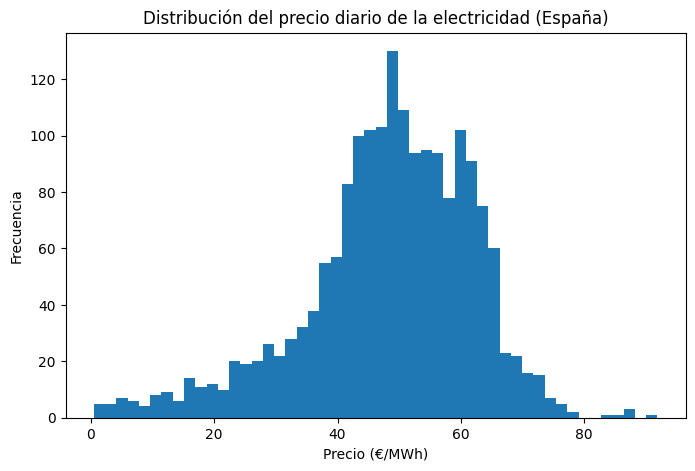

In [54]:
plt.figure(figsize=(8,5))
plt.hist(df_wide["Precio mercado SPOT Diario ESP"], bins=50)
plt.xlabel("Precio (€/MWh)")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio diario de la electricidad (España)")
plt.show()

El histograma muestra que la mayoría de los precios diarios de la electricidad en España se concentran entre aproximadamente 42 y 65 €/MWh, indicando un rango de precios típico del mercado. También se observan valores extremos, lo que refleja la influencia de múltiples factores del mercado energético.

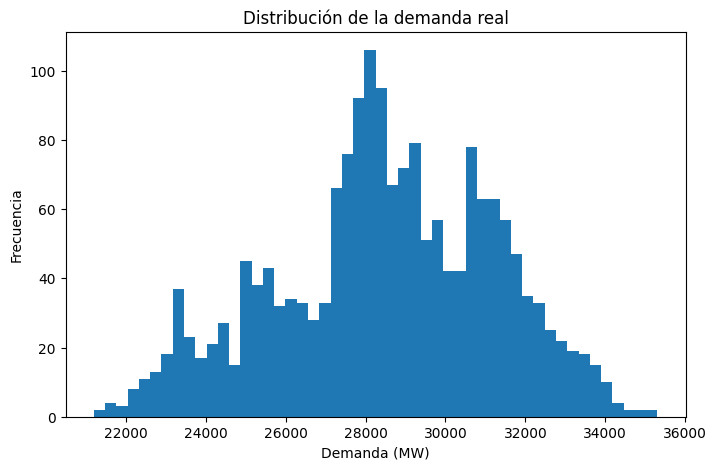

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df_wide["Demanda real"], bins=50)
plt.xlabel("Demanda (MW)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la demanda real")
plt.show()


La demanda real presenta una distribución concentrada principalmente entre los 26.000 y 31.000 MW, lo que indica un rango de consumo habitual del sistema eléctrico español. Se visualizan picos de demandas poco frecuentes que podrían estar asociados a incrementos en el precio de la energía.

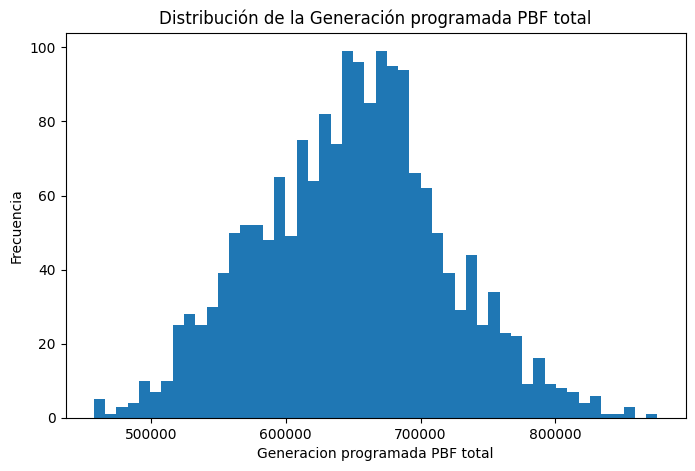

In [60]:
plt.figure(figsize=(8,5))
plt.hist(df_wide["Generación programada PBF total"], bins=50)
plt.xlabel("Generacion programada PBF total")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Generación programada PBF total")
plt.show()


La generación programada PBF total refleja la planificación previa del sistema eléctrico español, la cual se ajusta a los niveles de demanda esperados. Esto podría indicar que, ante una mayor generación planificada (asociada a una alta demanda prevista), el precio de la energía tiende a incrementarse.

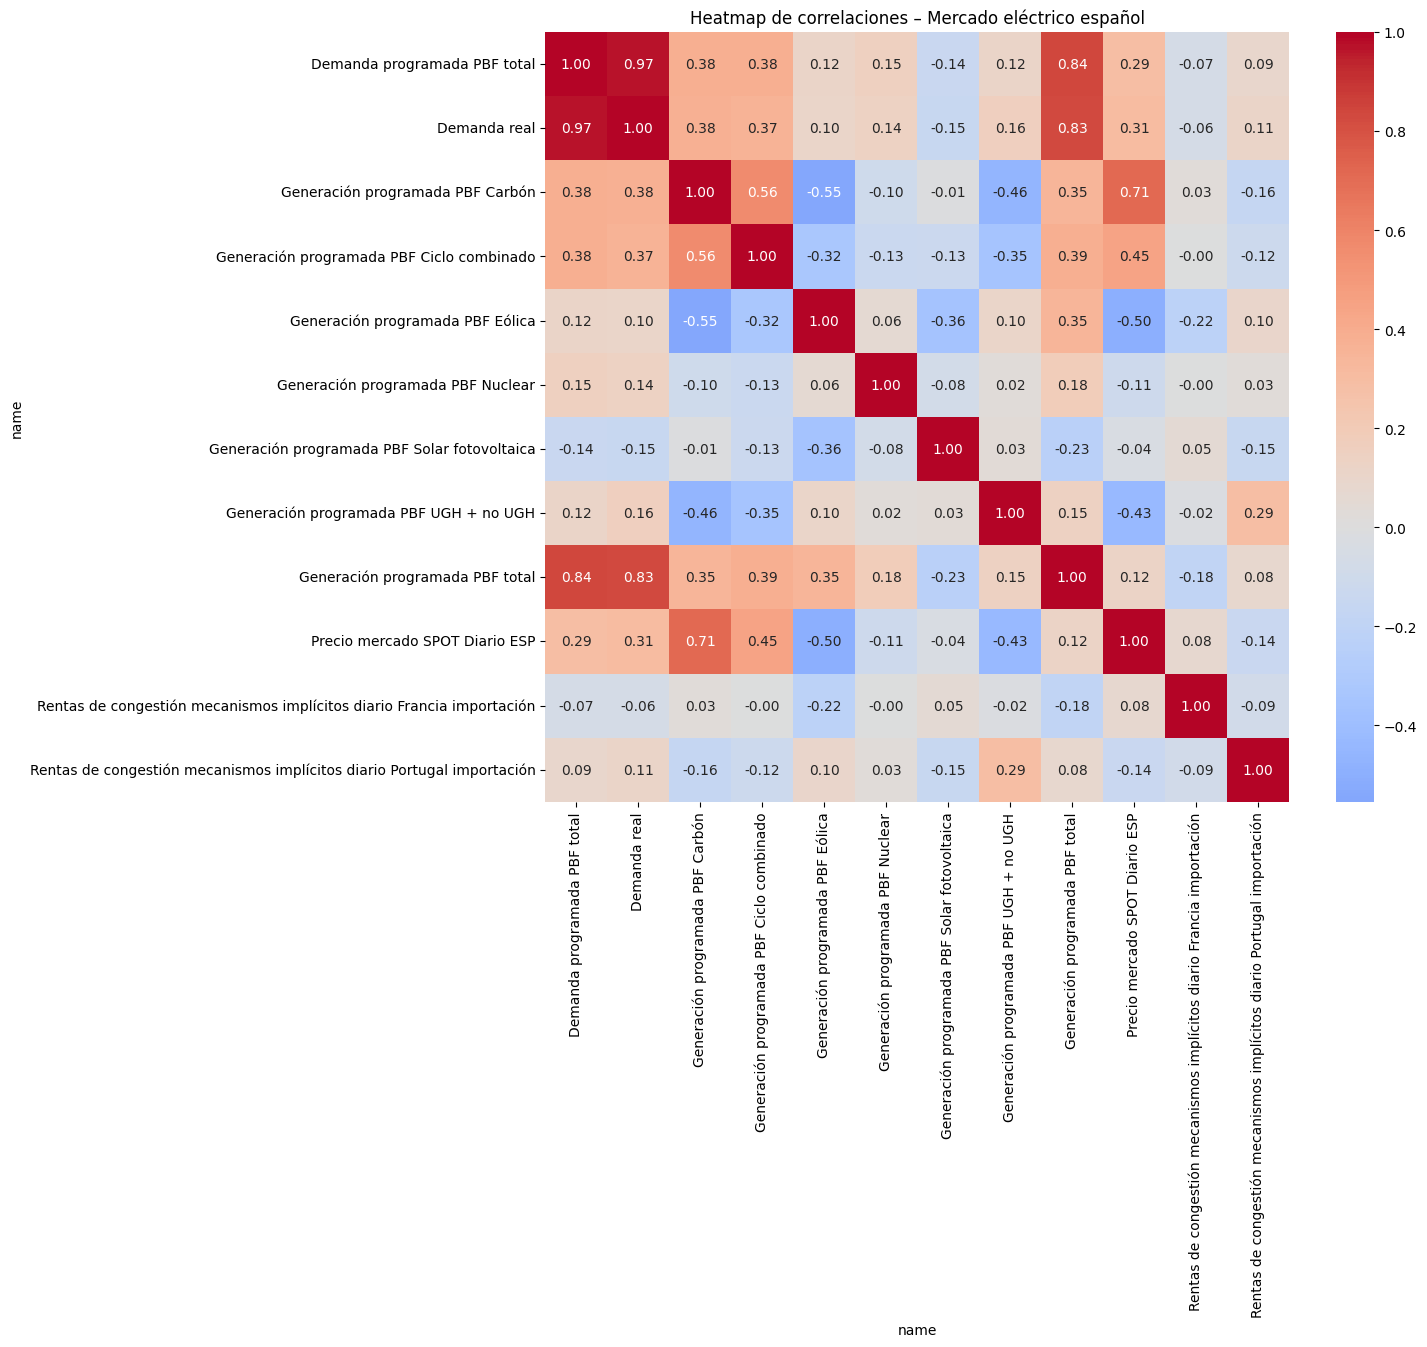

In [66]:
# Selección de variables
cols = [
    'Demanda programada PBF total',
    'Demanda real',
    'Generación programada PBF Carbón',
    'Generación programada PBF Ciclo combinado',
    'Generación programada PBF Eólica',
    'Generación programada PBF Nuclear',
    'Generación programada PBF Solar fotovoltaica',
    'Generación programada PBF UGH + no UGH',
    'Generación programada PBF total',
    'Precio mercado SPOT Diario ESP',
    'Rentas de congestión mecanismos implícitos diario Francia importación',
    'Rentas de congestión mecanismos implícitos diario Portugal importación'
]

# Matriz de correlación
corr = df_wide[cols].corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Heatmap de correlaciones – Mercado eléctrico español")
plt.show()


Se observa que las energías renovables, especialmente la generación eólica y la hidráulica (UGH + no UGH), están asociadas a precios más bajos en el mercado spot. Por el contrario, las energías no renovables, como el carbón y el ciclo combinado (gas natural), muestran una relación positiva con el precio diario. Un aumento en la generación de estas fuentes suele coincidir con precios más elevados.
Asimismo, tanto la demanda programada como la demanda real presentan una fuerte relación con el precio: a mayor demanda esperada o efectiva, mayor precio de la electricidad, reflejando la presión del consumo sobre el sistema eléctrico.
## Variables clave

Precio mercado SPOT Diario ESP

Demanda programada PBF total

Demanda real

Generación programada PBF Eólica

Generación programada PBF UGH + no UGH

Generación programada PBF Ciclo combinado

Generación programada PBF Carbón


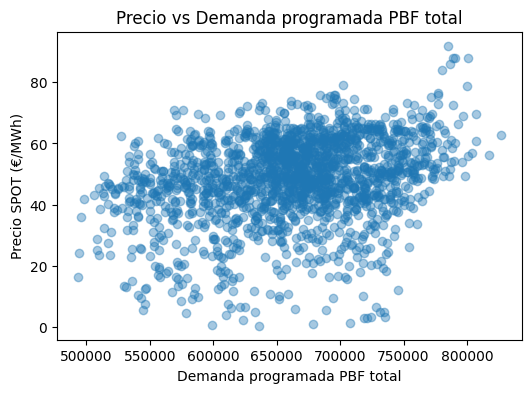

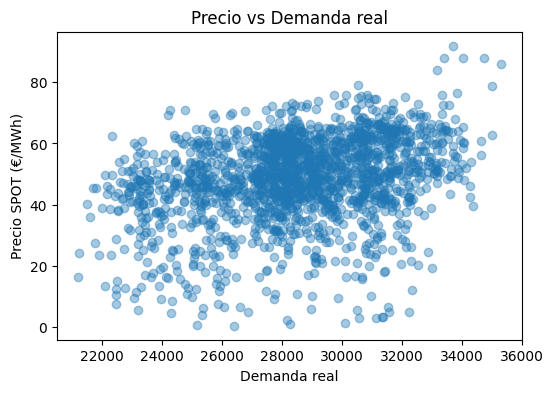

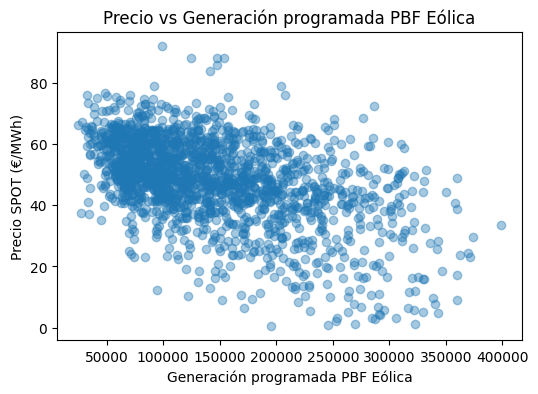

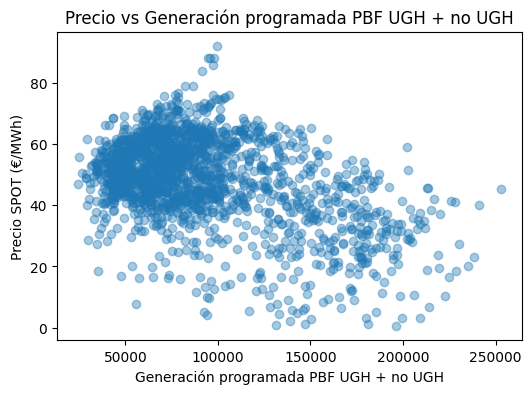

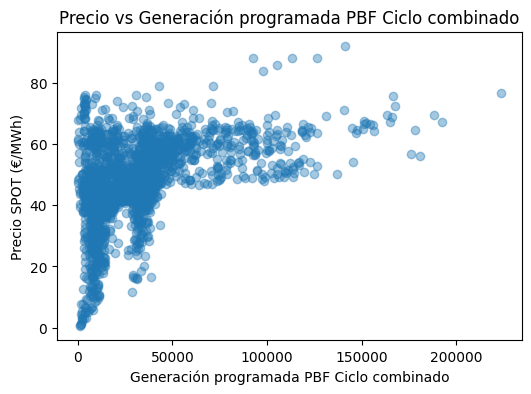

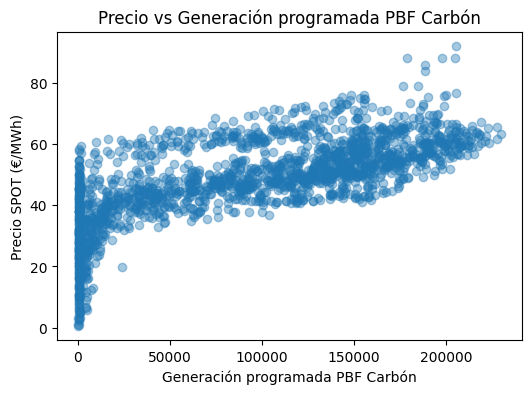

In [67]:
variables = [
    "Demanda programada PBF total",
    "Demanda real",
    "Generación programada PBF Eólica",
    "Generación programada PBF UGH + no UGH",
    "Generación programada PBF Ciclo combinado",
    "Generación programada PBF Carbón"
]

precio = "Precio mercado SPOT Diario ESP"

for var in variables:
    plt.figure(figsize=(6,4))
    plt.scatter(df_wide[var], df_wide[precio], alpha=0.4)
    plt.xlabel(var)
    plt.ylabel("Precio SPOT (€/MWh)")
    plt.title(f"Precio vs {var}")
    plt.show()


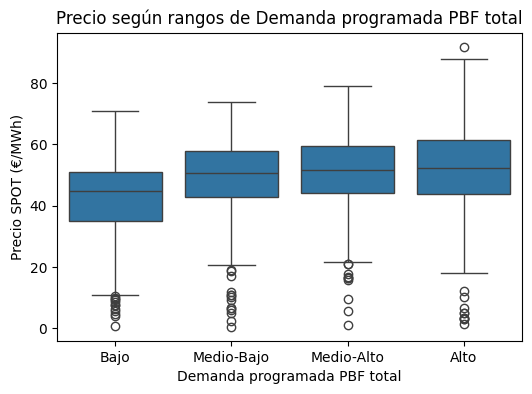

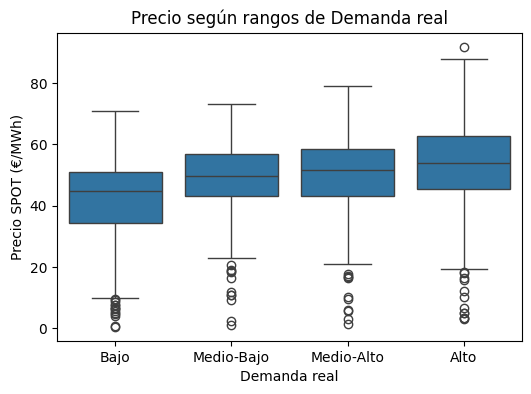

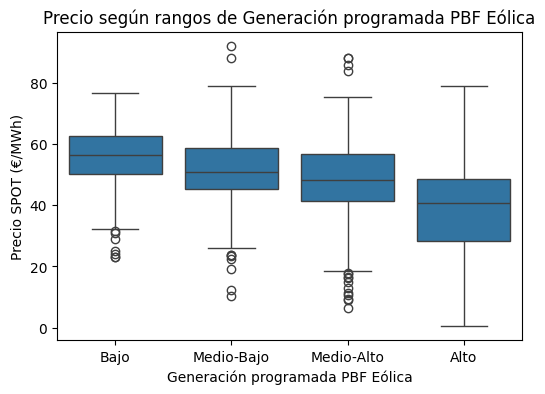

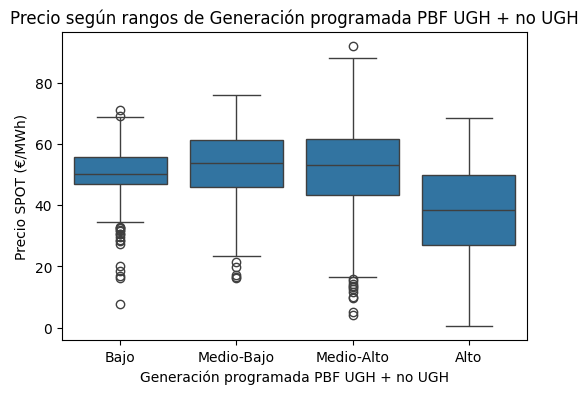

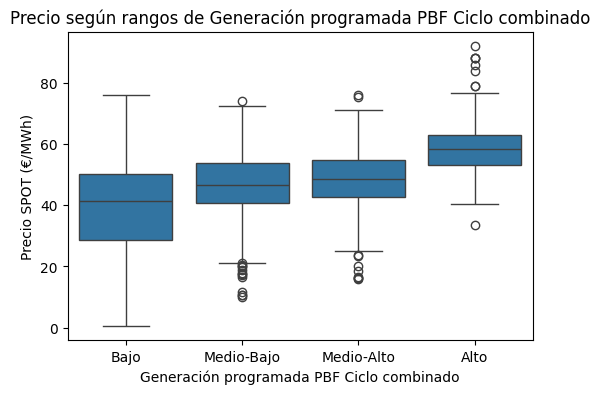

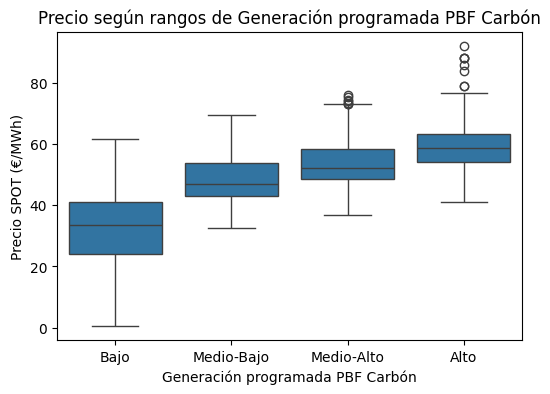

In [68]:
for var in variables:
    df_temp = df_wide[[var, precio]].dropna()
    df_temp["rango"] = pd.qcut(df_temp[var], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

    plt.figure(figsize=(6,4))
    sns.boxplot(x="rango", y=precio, data=df_temp)
    plt.title(f"Precio según rangos de {var}")
    plt.xlabel(var)
    plt.ylabel("Precio SPOT (€/MWh)")
    plt.show()


El análisis exploratorio muestra que el precio diario de la electricidad en España no está fuertemente determinado por la demanda, sino principalmente por la composición de la generación. Las energías renovables, como la eólica y la hidráulica, presentan una relación inversa con el precio, contribuyendo a su reducción. En cambio, una mayor participación de tecnologías no renovables, como el carbón y el ciclo combinado, se asocia con precios más altos. Estos efectos son moderados pero consistentes, lo que refleja la complejidad del mercado eléctrico y la interacción de múltiples factores.

## Variables temporales

* Mes
* Dia de la semana
* Estacion del año

In [ ]:
df_wide["month"] = df_wide.index.month
df_wide["day_of_week"] = df_wide.index.dayofweek

In [70]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Invierno"
    elif month in [3, 4, 5]:
        return "Primavera"
    elif month in [6, 7, 8]:
        return "Verano"
    else:
        return "Otoño"

df_wide["season"] = df_wide["month"].apply(get_season)


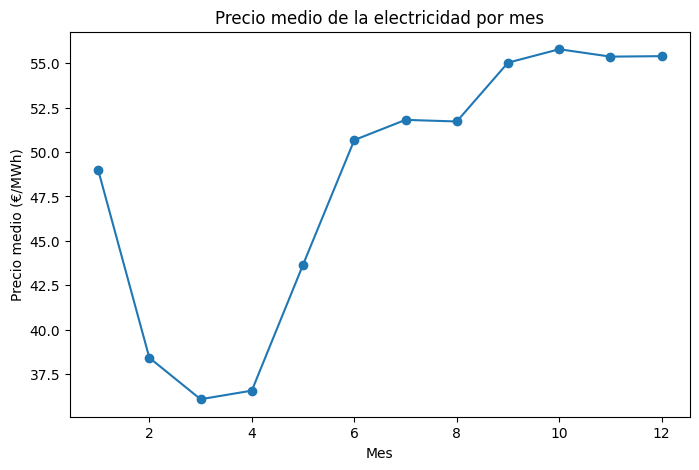

In [72]:
price_by_month = df_wide.groupby("month")["Precio mercado SPOT Diario ESP"].mean()

plt.figure(figsize=(8,5))
plt.plot(price_by_month, marker="o")
plt.xlabel("Mes")
plt.ylabel("Precio medio (€/MWh)")
plt.title("Precio medio de la electricidad por mes")
plt.show()


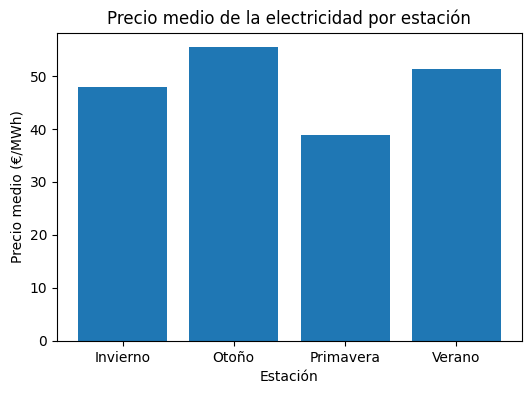

In [73]:
price_by_season = df_wide.groupby("season")["Precio mercado SPOT Diario ESP"].mean()

plt.figure(figsize=(6,4))
plt.bar(price_by_season.index, price_by_season.values)
plt.xlabel("Estación")
plt.ylabel("Precio medio (€/MWh)")
plt.title("Precio medio de la electricidad por estación")
plt.show()


<Figure size 600x400 with 0 Axes>

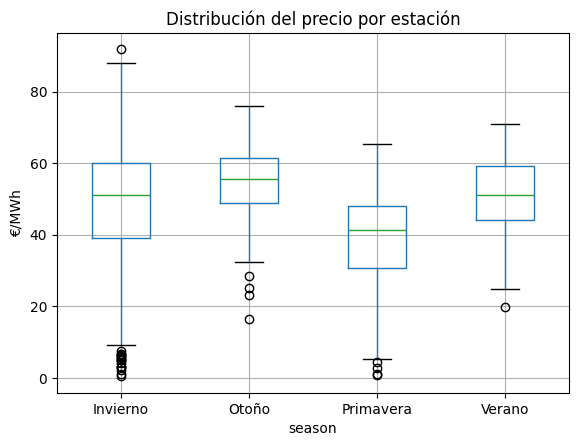

In [74]:
plt.figure(figsize=(6,4))
df_wide.boxplot(column="Precio mercado SPOT Diario ESP", by="season")
plt.title("Distribución del precio por estación")
plt.suptitle("")
plt.ylabel("€/MWh")
plt.show()


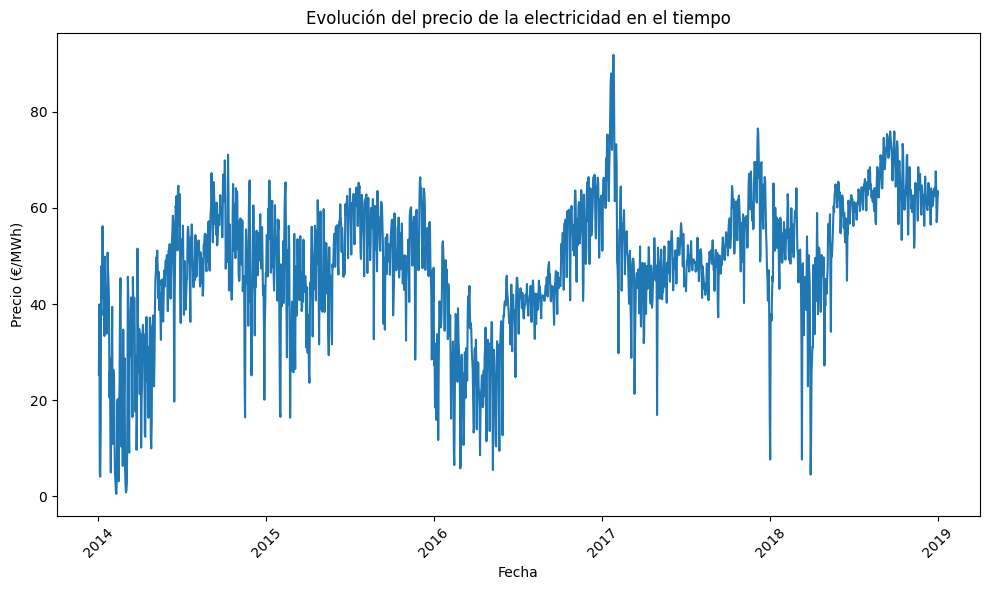

In [87]:
plt.figure(figsize=(10,6))
plt.plot(df_wide.index, df_wide["Precio mercado SPOT Diario ESP"])
plt.xlabel("Fecha")
plt.ylabel("Precio (€/MWh)")
plt.title("Evolución del precio de la electricidad en el tiempo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El análisis temporal revela que el precio se mantiene elevado durante todo el año, con picos más frecuentes hacia los últimos meses, especialmente en otoño e invierno, y con una mayor dispersión de valores en estas estaciones, lo que refuerza la idea de que factores estacionales y estructurales del sistema eléctrico influyen en la formación del precio.